In [1]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Define upper limit (e.g., 99th percentile)
upper_limit = df_DA_US['salary_year_avg'].quantile(0.99)

# Filter out extreme high salaries
df_DA_US_no_outliers = df_DA_US[df_DA_US['salary_year_avg'] <= upper_limit]

print("Before:", len(df_DA_US))
print("After:", len(df_DA_US_no_outliers))
print("Upper limit (99th percentile):", upper_limit)


Before: 4553
After: 4507
Upper limit (99th percentile): 321919.99999999825


C:\Users\PARS COMPUTER\AppData\Local\Temp\ipykernel_8316\1020655547.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels= job_titles, vert=False)


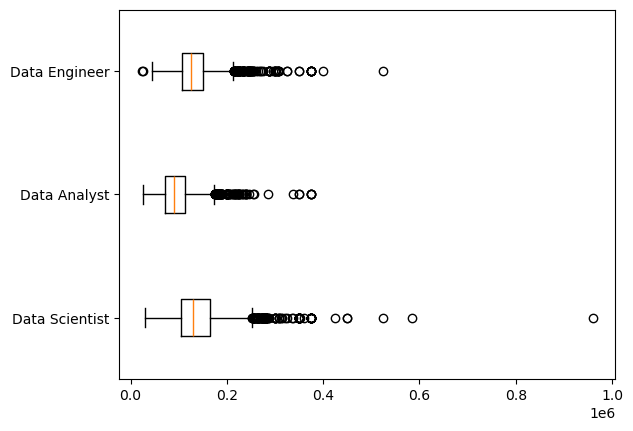

In [5]:
# df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels= job_titles, vert=False)
plt.show()